## Wordcloud comparison between LDA and BERTopics

In [28]:
import pandas as pd
import wordcloud
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
lda=pd.read_csv(r'C:\Users\p_uli\Desktop\Columbia University\Cursos\Fall 22\Capstone\Data\LDA4_topics_100.csv')

In [42]:
bertopic=pd.read_csv(r'C:\Users\p_uli\Desktop\Columbia University\Cursos\Fall 22\Capstone\Data\BERTopic\top_words_all-MiniLM-L6-v2_10_(1, 2)_10_10_50.csv')

In [43]:
lda.head()
#bertopic.head()

,topic,term,beta
0,1,power,0.012617
1,1,energy,0.010424
2,1,price,0.009156
3,1,said,0.008769
4,1,market,0.008454


In [44]:
# standardized metrics
bertopic['prop']=bertopic.groupby(['topic'])['c-tf-idf'].apply(lambda x: round(100*x/float(x.sum())) )
lda['prop']=lda.groupby(['topic'])['beta'].apply(lambda x: round(100*x/float(x.sum())) )
model_name=['BERTopic','LDA']

In [48]:
lda=lda.groupby('topic').head(10).reset_index(drop=True)
bertopic= bertopic[bertopic['topic'].isin(range(0,7))]

,topic,top_words,c-tf-idf,prop
0,0,think,0.066124,18.0
1,0,know,0.056768,15.0
2,0,let,0.040311,11.0
3,0,funny,0.035061,9.0
4,0,let know,0.031001,8.0
...,...,...,...,...
65,6,corp,0.040179,10.0
66,6,email,0.033601,8.0
67,6,use,0.028244,7.0
68,6,may,0.027945,7.0


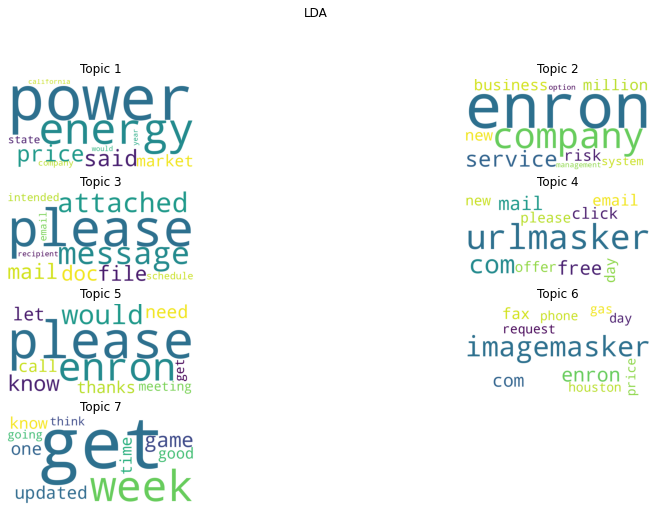

In [50]:
# total body

fig = plt.figure(figsize=(15,10))
for j in range(7):
    ax = fig.add_subplot(5,2,j+1)
    w_lda = dict(zip(lda[lda['topic']==j+1]['term'].tolist(), lda[lda['topic']==j+1]['prop'].tolist()))
    # wordcloud 
    wc = WordCloud(
        # width=2200, height=2200,
          background_color='white',
              mode='RGB', 
          # mask=backgroud, # create mask for the workcloud
          max_words=500,
          stopwords=set(['email','enroncom','enron','please','s']),
          # font_path='C:\Windows\Fonts\STZHONGS.ttf',
          max_font_size=150,
          # relative_scaling=1, =
          random_state=50, 
          scale=2,
          collocations=False 
          ).generate_from_frequencies(w_lda)

    ax.imshow(wc,)
    title='Topic {}'.format(j+1)
    ax.title.set_text(title)
    ax.axis('off')

fig.suptitle('LDA');


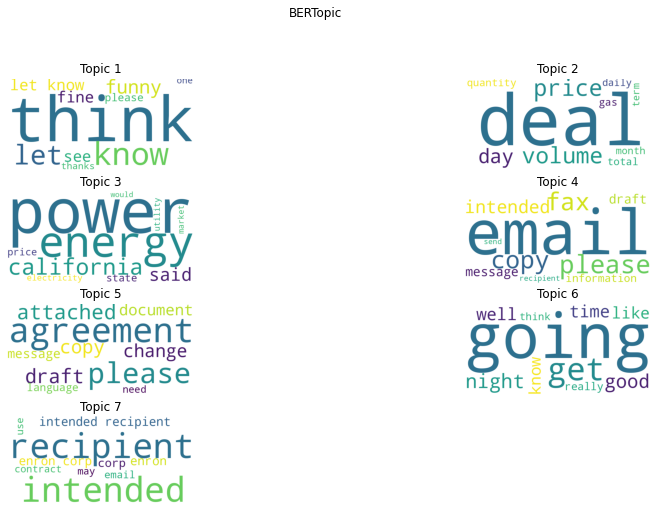

In [51]:
# total body

fig = plt.figure(figsize=(15,10))
for j in range(7):
    ax = fig.add_subplot(5,2,j+1)
    w_bert = dict(zip(bertopic[bertopic['topic']==j]['top_words'].tolist(), bertopic[bertopic['topic']==j]['prop'].tolist()))
    # wordcloud 
    wc = WordCloud(
        # width=2200, height=2200,
          background_color='white',
              mode='RGB', 
          # mask=backgroud, # create mask for the workcloud
          max_words=500,
          stopwords=set(['email','enroncom','enron','please','s']),
          # font_path='C:\Windows\Fonts\STZHONGS.ttf',
          max_font_size=150,
          # relative_scaling=1, =
          random_state=50, 
          scale=2,
          collocations=False 
          ).generate_from_frequencies(w_bert)

    ax.imshow(wc,)
    title='Topic {}'.format(j+1)
    ax.title.set_text(title)
    ax.axis('off')

fig.suptitle('BERTopic');

In [53]:
# topics
# emails_assignment= pd.read_csv(r'C:\Users\p_uli\Desktop\Columbia University\Cursos\Fall 22\Capstone\Data\LDA_BERTopic_assigns.csv')
# data=pd.read_csv(r'C:\Users\p_uli\Desktop\Columbia University\Cursos\Fall 22\Capstone\Data\emails_mask_name.csv')
lda_assign= pd.read_csv(r'C:\Users\p_uli\Desktop\Columbia University\Cursos\Fall 22\Capstone\Data\LDA4_emails_assignments.csv')
bert_assign= pd.read_csv(r'C:\Users\p_uli\Desktop\Columbia University\Cursos\Fall 22\Capstone\Data\BERTopic\assignments_all-MiniLM-L6-v2_10_(1, 2)_10_10_50.csv')

In [75]:
emails_assignment=pd.merge(bert_assign[['email_id','email','topic','probs']], lda_assign[['document','topic','gamma']],how='left',left_on='email_id',right_on='document',suffixes=('_bert','_lda'))

In [65]:
# emails_assignment=emails_assignment.merge(data[['email_id','email']], on='email_id', how='left')

In [77]:
emails_assignment.dropna(inplace=True)
emails_assignment.reset_index(inplace=True)
emails_assignment.head()

,level_0,index,email_id,email,topic_bert,probs,document,topic_lda,gamma
0,0,0,saibi-e\inbox\612#1,"Dear Power Outage Database Customer,\n\nAttach...",1,3.736004e-03,saibi-e\inbox\612#1,3.0,0.994489
1,1,1,kitchen-l\_americas\netco_restart\28#2,Ryan is waffling. I talked to him this weeken...,8,1.941748e-01,kitchen-l\_americas\netco_restart\28#2,7.0,0.643357
2,2,2,motley-m\sent_items\1#1,"<center><LI><a Href=""http://www.nwrfc.noaa.gov...",1,3.276585e-02,motley-m\sent_items\1#1,6.0,0.349052
3,3,3,kaminski-v\all_documents\577#1,"Hi everyone,\n\nI have run the model and, alon...",2,4.917910e-02,kaminski-v\all_documents\577#1,2.0,0.651115
4,4,5,kaminski-v\deleted_items\2374#1,=20\n[IMAGE]=09\n\n\n[IMAGE] [IMAGE][IMAGE][IM...,5,1.293074e-306,kaminski-v\deleted_items\2374#1,6.0,0.949747


In [92]:
# emails_assignment.to_csv(r'C:\Users\p_uli\Desktop\Columbia University\Cursos\Fall 22\Capstone\Data\LDA_BERTopic_assigns_w_text.csv',index_label=False)
# emails_assignment.to_csv(r'C:\Users\p_uli\Desktop\Columbia University\Cursos\Fall 22\Capstone\Data\LDA_BERTopic_assigns_w_text.txt',index_label=False)
# emails_assignment= pd.read_csv(r'C:\Users\p_uli\Desktop\Columbia University\Cursos\Fall 22\Capstone\Data\LDA_BERTopic_assigns.csv')
# emails_assignment['email_id'][[8200,666,909,987]]


In [103]:
index=8600
print(emails_assignment['email'][index])
print("LDA: ",emails_assignment['topic_lda'][index])
print("BERTopic: ",emails_assignment['topic_bert'][index])

Attached is the updated status of the steel trades/transactions that have potential LOC/cashflow impact in the next few months.  According to Kent, who had a direct conversation with Bowen late yesterday, all new steel trades/structured transactions not yet agreed to will require Bowen approval prior to being reviewed by RAC.  

In summary, the commitment status for the Kibar and EDZK trades is yet to be determined, upon reviewing the taped conversation between the traders and the counterparties.  Duferco payments for the final 100,000 ton slab purchase and the $40,000 option are up for restructuring next week with the company.

Please let me know if you have any questions/concerns.  Thanks.

 << File: steel pipeline 110201.xls >> 
LDA:  2.0
BERTopic:  4


In [99]:
index=666
print(emails_assignment['email'][index])
print("LDA: ",emails_assignment['topic_lda'][index])
print("BERTopic: ",emails_assignment['topic_bert'][index])

I will make the call and research.

Rita
LDA:  5.0
BERTopic:  7


In [100]:
index=909
print(emails_assignment['email'][index])
print("LDA: ",emails_assignment['topic_lda'][index])
print("BERTopic: ",emails_assignment['topic_bert'][index])

Just wanted to keep you all informed of my recent discussions with Kinder 
Morgan regarding potentially selling them 4 LM 6000's.  At first they were 
interested in some of the development sites, but became more interested in 
the equipment.  They are trying to get their hands on as many LM 6000's as 
possible, because of their plant configuration utilizing 6 LM 6000's per 
plant.  With my last dicussion as of yesterday (Tuesday the 5th), I gave them 
the approximate price at which they could buy the turbines for - $15,000,000 
per turbine.  Their comment was it was a little on the high side, but they 
still sounded interested because of the quick time frame of receiving them - 
1st Qtr. '01.  If they are still interested they will get back with me with a 
non-binding term sheet within the next couple of weeks.  Please let me know 
if you have any comments.  Thank you!
Ben
LDA:  5.0
BERTopic:  1


In [107]:
index=12309
print(emails_assignment['email'][index])
print("LDA: ",emails_assignment['topic_lda'][index])
print("BERTopic: ",emails_assignment['topic_bert'][index])

aol adress at home is jtholt1122@aol.com.  We are going to buy a camera-I'll 
let you know when we get it.  Joe is going to deliver some of Grady's cars to 
his new house.  I told him to take pictures for us.
LDA:  7.0
BERTopic:  5


## previous examples

In [139]:
index=8200
print(emails_assignment['email'][index])
print("LDA: ",emails_assignment['LDA topic'][index])
print("BERTopic: ",emails_assignment['BERTopic topic'][index])

                                Internal Use Only 

 Following my earlier email , attached for your review is a draft Order Form for 
 the data component of the EnronOnline.com transaction .    Please note that my 
 business principals have not reviewed either Order Form for completeness or 
 accuracy and therefore the Order Forms are subject to comment by them . 


 ( See attached file : Enron - Investor - DataOrderForm 42000.doc ) 

LDA:  9
BERTopic:  7


In [143]:
index=666
print(emails_assignment['email'][index])
print("LDA: ",emails_assignment['LDA topic'][index])
print("BERTopic: ",emails_assignment['BERTopic topic'][index])

After reviewing the Doorstep audit at Long Beach with the team I have the following conclusion : 

 1 . We should shut these offices down because we can not control them . They do n't make much money and will be a huge negative after losses at Long Beach . 

 ---or---- 

 2 . We establish a rigid template for how these offices operate . My thought is that we create a McDonalds Hamburger type operation . Each office is exactly the same and operates under precise and well communicated rules . " Hamburger " quality is monitored from Houston routinely . 

 There are a huge number of these remote offices so we need to address how we proceed . 

LDA:  10
BERTopic:  9


In [144]:
index=909
print(emails_assignment['email'][index])
print("LDA: ",emails_assignment['LDA topic'][index])
print("BERTopic: ",emails_assignment['BERTopic topic'][index])

 

 slide number 8 .... 



LDA:  6
BERTopic:  2


In [152]:
index = 987
print(emails_assignment['email'][index])
print("LDA: ",emails_assignment['LDA topic'][index])
print("BERTopic: ",emails_assignment['BERTopic topic'][index])

You asked for the latest news about Nokia products . So , 
 here it is . Our newest phone has just arrived ... 
 the Nokia 3360 . 

 You 'll love it . It 's hip and slick and loaded with Cool . 
 With changeable color covers , unique ring tones , and 
 different profiles , you get a great - looking phone that 
 adapts to fit your style . 

 Click here to learn more and find out where you can buy 
 the Nokia 3360 . 

 http://nokia.bp00.com/t.aspx?LGUID=294573bb55234fd1b864d36936c48227&UID=D8ZKSYJ3 

 See Nokia Original Accessories > > 
 http://nokia.bp00.com/t.aspx?LGUID=a28b48565a47437aa809b0c62c4ac2fd&UID=D8ZKSYJ3 

 Store Locator > > 
 http://nokia.bp00.com/t.aspx?LGUID=0128389c83cd4ee69a3b42fadaea7fe6&UID=D8ZKSYJ3 

 * * * Check out a few features of the Nokia 3360 . * * * 

 -Mobile Messaging * 
 Sometimes a little note can make a powerful statement . 

 -Wireless Internet * 
 News , sports and more ... so easy . 

LDA:  1
BERTopic:  1
